### A. Perkenalan

Kelompok 5 :
- Adjie Perdana Kusuma (PYTN-KS12-010)
- Yunita Yulianda (PYTN-KS12-001)
- Naufal Reza Pahlevi (PYTN-KS12-021)

Dataset yang digunakan adalah dataset "Rain In Australia" yang merupakan dataset yang berisi informasi tentang cuaca di berbagai wilayah di Australia, dengan fokus pada variabel hujan. Dataset ini terdiri dari data cuaca harian dari tahun 2008 hingga 2017, dan terdiri dari sekitar 145.460 baris data. Database ini memiliki 23 atribut. Dengan data hujan harian selama 10 tahun di Australia, kolom RainTomorrow adalah target variable yang mau kita prediksi. Jika “Yes” maka besok harinya disana hujan 1mm atau lebih, jika "No" maka besok harinya tidak hujan. Dataset diambil dari website kaggle https://www.kaggle.com/jsphyg/weather-dataset-rattle-package. 

### B. Import pustaka yang dibutuhkan

In [139]:
# Data Loading, data cleaning
import numpy as np
import pandas as pd

# Data Exploration
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Data Definition
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss
from sklearn import svm
from sklearn.metrics import roc_curve, roc_auc_score



Dilakukan import library yang dibutuhkan selama pengerjaan project, dan juga melakukan akses ke beberapa fungsi untuk nantinya akan digunakan selama proses menjalankan model

### C. Data Loading

In [2]:
# Membaca file dataset csv

df = pd.read_csv("Dataset/weatherAUS.csv")

Dilakukan proses membaca file csv menggunakan library pandas. Data tersebut kemudian dimasukkan dalam dataFrame dengan nama df agar mempermudah penggunaan ke proses selajutnya.  

In [3]:
# Menampilkan data teratas

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Menampilkan 5 data teratas dan dapat dilihat bahwa data ini berisi 23 kolom dimulai dari Date sampai ke kolom RainTomorrow

In [4]:
# Menampilkan data terbawah

df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


Menampilkan 5 data terbawah dengan fungsi tail(). Dapat dilihat bahwa baris terbawah dari data ini adalah 145459

In [6]:
# Melihat informasi data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Code diatas digunakan untuk mengetahui informasi umum tentang dataset, seperti jumlah baris dan kolom, tipe data dari setiap kolom, serta jumlah nilai yang hilang atau kosong pada setiap kolom. Dapat dilihat bahwa fitur-fitur dalam data ini memiliki keberagaman tipe data yaitu float64(16 fitur) dan object (7 fitur).

In [7]:
# Melihat dimensi data

df.shape

(145460, 23)

Menampilkan dimensi data yang berisikan 145460 baris dan 23 kolom/fitur.

In [8]:
# Menampilkan jumlah nilai null dalam data beserta presentasinya

total = df.isna().sum().sort_values(ascending=False)
percent = (df.isna().sum()/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Sunshine,69835,0.480098
Evaporation,62790,0.431665
Cloud3pm,59358,0.408071
Cloud9am,55888,0.384216
Pressure9am,15065,0.103568
Pressure3pm,15028,0.103314
WindDir9am,10566,0.072639
WindGustDir,10326,0.070989
WindGustSpeed,10263,0.070555
Humidity3pm,4507,0.030984


Menampilkan total jumlah nilai null dan persennya dari masing masing kolom, lalu diurutkan berdasarkan total nilai null terbanyak hingga paling sedikit.

### D. Data Cleaning

In [9]:
# Menghapus kolom yang tidak penting

df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

Menghapus semua baris yang berisikan nilai null dari kolom 'RainToday' dan 'RainTomorrow' karena 2 variabel ini yang paling berpengaruh ke data kelas. 

In [10]:
# Melihat dimensi data terbaru

print("Dimensi dari data baru : " , df.shape)

Dimensi dari data baru :  (140787, 23)


Menampilkan jumlah dimensi setelah melakukan penghapusan nilai null pada kedua kolom 'RainToday' dan 'RainTomorrow'. Dimensi berkurang menjadi 140787 baris.

In [11]:
# Menampilkan jumlah nilai null dalam data beserta presentasinya

total = df.isna().sum().sort_values(ascending=False)
percent = (df.isna().sum()/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Sunshine,66805,0.474511
Evaporation,59694,0.424002
Cloud3pm,56094,0.398432
Cloud9am,52625,0.373792
Pressure3pm,13769,0.097800
Pressure9am,13743,0.097616
WindDir9am,9660,0.068614
WindGustDir,9163,0.065084
WindGustSpeed,9105,0.064672
WindDir3pm,3670,0.026068


Menampilkan kembali jumlah nilai null pada masing masing kolom, dan dapat dilihat bahwa kolom RainToday dan RainTomorrow sudah tidak memiliki nilai null.

In [12]:
# Menghapus kolom yang tidak penting

df.drop(['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'], axis=1, inplace=True)

Menghapus kolom 'Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am' karena memiliki jumlah missing value yang lebih dari 30%. Data tersebut tidak digantikan dengan niali lain karena ditakutkan nilai akan bias. 

In [13]:
# Melihat dimensi data terbaru

print("Dimensi dari data baru : " , df.shape)

Dimensi dari data baru :  (140787, 19)


Menampilkan dimensi terbaru berjumlah 140787 baris dan 19 kolom.

In [14]:
# Merubah nama data yang digunakan 

df.rename(columns={'WindGustDir':'WindDir24h', 'WindGustSpeed':'WindSpeed24h'}, inplace=True)

Melakukan perubahan nama kolom yaitu 'WindGustDir' menjadi 'WindDir24h' dan 'WindGustSpeed' menjadi 'WindSpeed24h'.

In [15]:
df.drop(['WindDir3pm', 'WindDir9am'], axis=1, inplace=True)

Menghapus kolom 'WindDir3pm', 'WindDir9am' karena sudah diwakilkan oleh kolom 'WindDir24h'.

In [16]:
total = df.isna().sum().sort_values(ascending=False)
percent = (df.isna().sum()/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Pressure3pm,13769,0.097800
Pressure9am,13743,0.097616
WindDir24h,9163,0.065084
WindSpeed24h,9105,0.064672
Humidity3pm,3501,0.024867
Temp3pm,2624,0.018638
WindSpeed3pm,2531,0.017978
Humidity9am,1517,0.010775
WindSpeed9am,1055,0.007494
Temp9am,656,0.004660


Menampilkan kolom yang akan diolah datanya dan jumlah nilai null berserta persennya.

In [17]:
# Menampilkan korelasi data 

df.corr()

C:\Users\Fadli Putra\AppData\Local\Temp\ipykernel_5476\1136537323.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,MinTemp,MaxTemp,Rainfall,WindSpeed24h,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736015,0.104255,0.177927,0.175775,0.175835,-0.234441,0.005686,-0.451414,-0.462099,0.901828,0.708716
MaxTemp,0.736015,1.000000,-0.074839,0.068510,0.014468,0.051178,-0.506109,-0.509916,-0.331831,-0.427069,0.887038,0.984565
Rainfall,0.104255,-0.074839,1.000000,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.011477,-0.079178
WindSpeed24h,0.177927,0.068510,0.133497,1.000000,0.604513,0.686881,-0.215117,-0.026631,-0.457710,-0.412879,0.150574,0.033511
WindSpeed9am,0.175775,0.014468,0.086816,0.604513,1.000000,0.519980,-0.270564,-0.031638,-0.227540,-0.174497,0.129108,0.004878
WindSpeed3pm,0.175835,0.051178,0.057759,0.686881,0.519980,1.000000,-0.145967,0.016011,-0.295207,-0.254951,0.163972,0.028845
Humidity9am,-0.234441,-0.506109,0.223725,-0.215117,-0.270564,-0.145967,1.000000,0.668002,0.138916,0.186515,-0.473305,-0.500528
Humidity3pm,0.005686,-0.509916,0.255312,-0.026631,-0.031638,0.016011,0.668002,1.000000,-0.028127,0.051244,-0.222227,-0.558562
Pressure9am,-0.451414,-0.331831,-0.168085,-0.457710,-0.227540,-0.295207,0.138916,-0.028127,1.000000,0.961343,-0.422635,-0.286890
Pressure3pm,-0.462099,-0.427069,-0.126728,-0.412879,-0.174497,-0.254951,0.186515,0.051244,0.961343,1.000000,-0.470316,-0.389684


Menampilkan korelasi antar kolom dalam dataset

C:\Users\Fadli Putra\AppData\Local\Temp\ipykernel_5476\3237802711.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: title={'center': 'Correlation in Headmap\n'}>

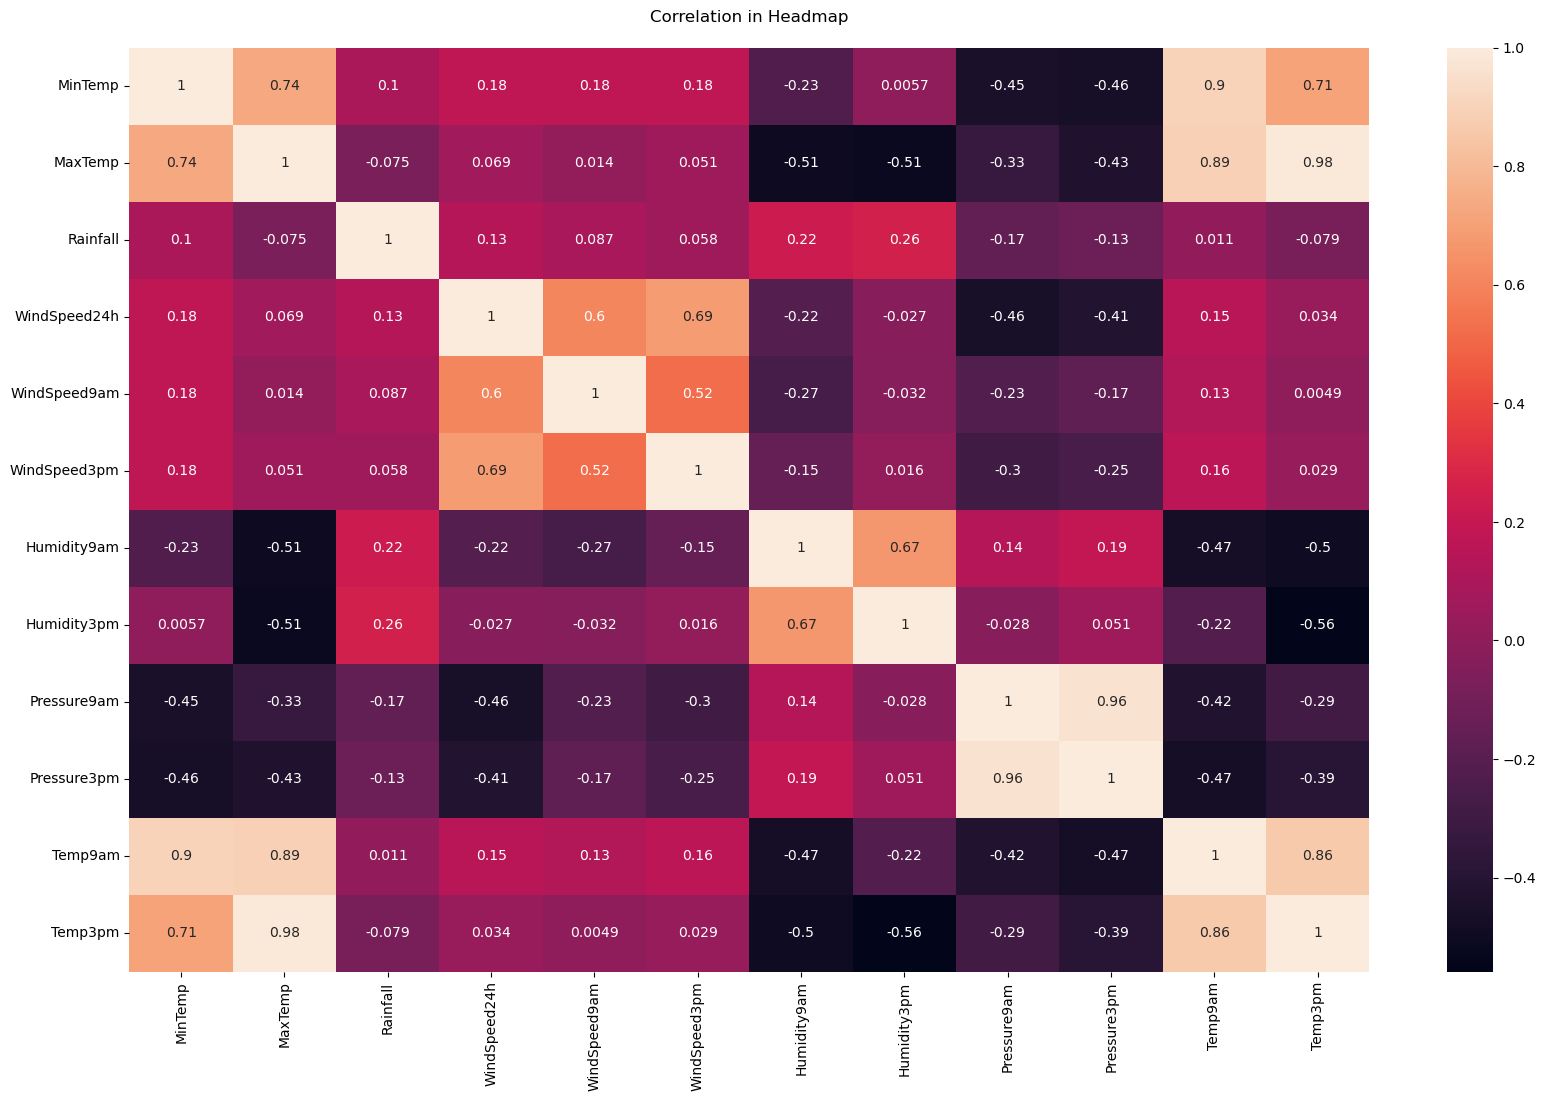

In [18]:
# Menampilkan visualisasi headmap untuk korelasi
plt.figure(figsize=(20, 12))
plt.title('Correlation in Headmap\n')
sns.heatmap(df.corr(),annot=True)

Menampilkan grafik korelasi berdasarkan hubungan antar kolom.

In [19]:
df['Pressure'] = (df['Pressure3pm'] + df['Pressure9am']) / 2

df.drop(['Pressure3pm', 'Pressure9am'], axis=1, inplace=True)

Menambahkan kolom baru yaitu kolom Pressure untuk mewakilkan kolom Pressure3pm dan Pressure9am dengan mencari nilai mean pada kedua kolom tersebut. Setelah itu kolom Pressure3pm dan Pressure9am dihapus dari dataset.

In [20]:
# Menampilkan 2 data teratas 

df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindDir24h,WindSpeed24h,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Pressure
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,20.0,24.0,71.0,22.0,16.9,21.8,No,No,1007.4
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,4.0,22.0,44.0,25.0,17.2,24.3,No,No,1009.2


Menampilkan kolom Pressure.

In [21]:
# Menghapus kolom yang tidak perlu 

df.drop(['Temp9am','Temp3pm'], axis=1, inplace=True)

Menghapus kolom Temp9am dan temp3pm dari dataset karena sudah ada MinTemp dan MaxTemp dalam waktu 24 jam.

In [22]:
# Menampilkan data teratas

df.head(1)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindDir24h,WindSpeed24h,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainTomorrow,Pressure
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,20.0,24.0,71.0,22.0,No,No,1007.4


Menampilkan semua kolom terbaru.

In [23]:
# Menampilkan nilai null dan persennya disetiap data

total = df.isna().sum().sort_values(ascending=False)
percent = (df.isna().sum()/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Pressure,13929,0.098937
WindDir24h,9163,0.065084
WindSpeed24h,9105,0.064672
Humidity3pm,3501,0.024867
WindSpeed3pm,2531,0.017978
Humidity9am,1517,0.010775
WindSpeed9am,1055,0.007494
MinTemp,468,0.003324
MaxTemp,307,0.002181
Date,0,0.000000


Menampilkan kembali jumlah nilai null dan persennya diurutkan berdasarkan jumlah terbanyak.

Text(0.5, 1.0, "Histogram dari Kolom 'MaxTemp'")

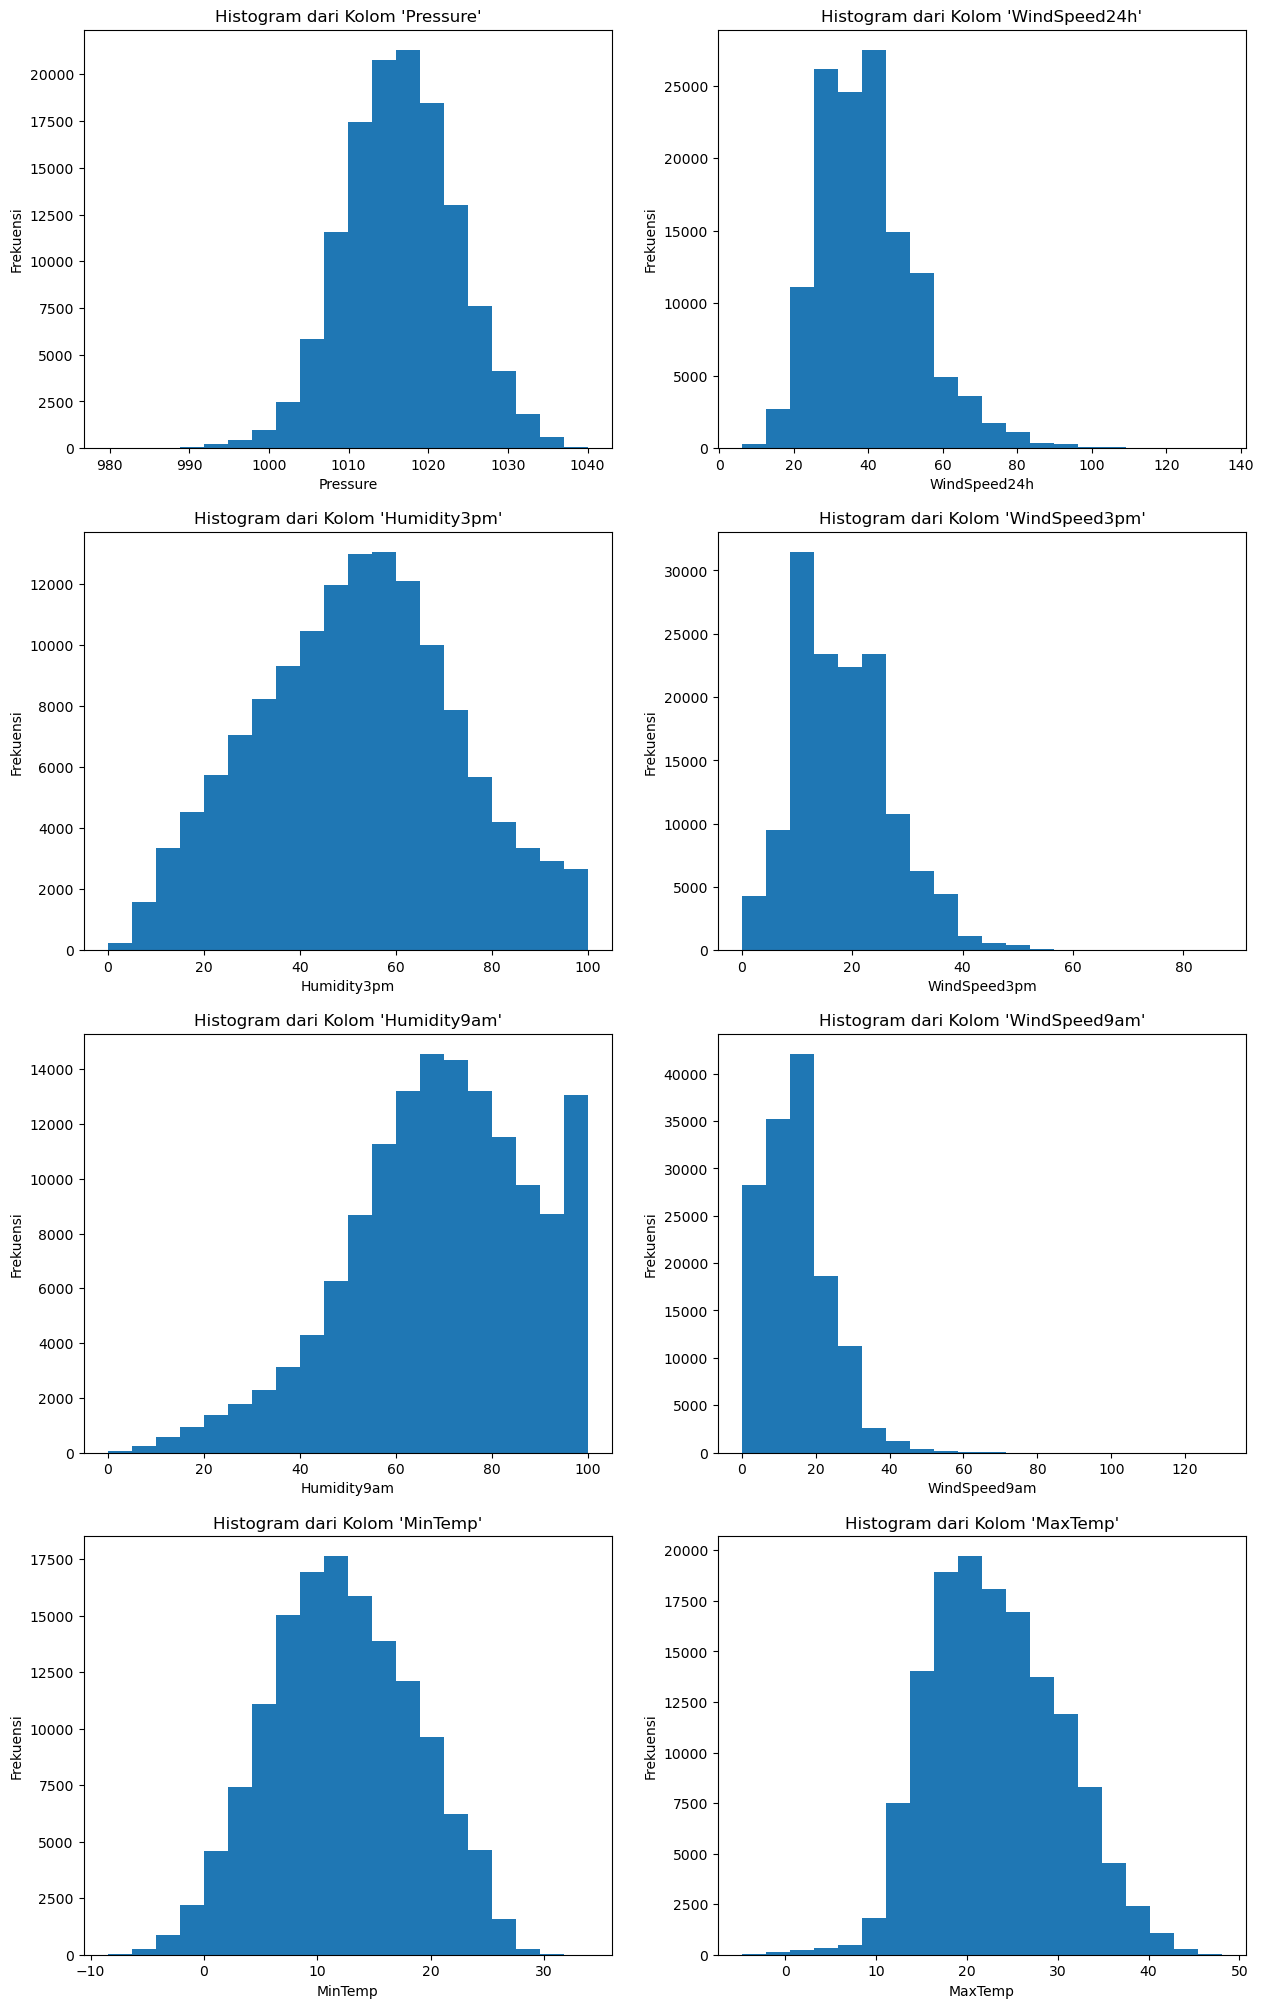

In [24]:
# tentukan jumlah subplot dan susunan subplot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 25))

# loop melalui setiap subplot dan buat histogram untuk kolom yang sesuai
kolom1 = 'Pressure'
axes[0, 0].hist(df[kolom1], bins=20)
axes[0, 0].set_xlabel(kolom1)
axes[0, 0].set_ylabel("Frekuensi")
axes[0, 0].set_title("Histogram dari Kolom '{}'".format(kolom1))

kolom2 = 'WindSpeed24h'
axes[0, 1].hist(df[kolom2], bins=20)
axes[0, 1].set_xlabel(kolom2)
axes[0, 1].set_ylabel("Frekuensi")
axes[0, 1].set_title("Histogram dari Kolom '{}'".format(kolom2))

kolom3 = 'Humidity3pm'
axes[1, 0].hist(df[kolom3], bins=20)
axes[1, 0].set_xlabel(kolom3)
axes[1, 0].set_ylabel("Frekuensi")
axes[1, 0].set_title("Histogram dari Kolom '{}'".format(kolom3))

kolom4 = 'WindSpeed3pm'
axes[1, 1].hist(df[kolom4], bins=20)
axes[1, 1].set_xlabel(kolom4)
axes[1, 1].set_ylabel("Frekuensi")
axes[1, 1].set_title("Histogram dari Kolom '{}'".format(kolom4))

kolom5 = 'Humidity9am'
axes[2, 0].hist(df[kolom5], bins=20)
axes[2, 0].set_xlabel(kolom5)
axes[2, 0].set_ylabel("Frekuensi")
axes[2, 0].set_title("Histogram dari Kolom '{}'".format(kolom5))

kolom6 = 'WindSpeed9am'
axes[2, 1].hist(df[kolom6], bins=20)
axes[2, 1].set_xlabel(kolom6)
axes[2, 1].set_ylabel("Frekuensi")
axes[2, 1].set_title("Histogram dari Kolom '{}'".format(kolom6))

kolom7 = 'MinTemp'
axes[3, 0].hist(df[kolom7], bins=20)
axes[3, 0].set_xlabel(kolom7)
axes[3, 0].set_ylabel("Frekuensi")
axes[3, 0].set_title("Histogram dari Kolom '{}'".format(kolom7))

kolom8 = 'MaxTemp'
axes[3, 1].hist(df[kolom8], bins=20)
axes[3, 1].set_xlabel(kolom8)
axes[3, 1].set_ylabel("Frekuensi")
axes[3, 1].set_title("Histogram dari Kolom '{}'".format(kolom8))

Menampilkan Distribusi beserta persebarannya dari masing masing fitur/kolom kategorikal. Dapat dilihat terdapat beberapa kolom yang distribusinya skew, untuk yang memiliki distribusi skew nilai missing akan digantikan dengan nilai median data, sedangkan kolom/fitur yang memiliki distribusi normal maka nilai missingnya akan digantikan dengan nilai mean dari data. 

In [25]:
df['Pressure'].fillna(df['Pressure'].mean(), inplace=True)

df['Humidity3pm'].fillna(df['Humidity3pm'].mean(), inplace=True)

df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)

df['MaxTemp'].fillna(df['MaxTemp'].mean(), inplace=True)

Untuk Distribusi normal, nilai null pada masing masing fitur/kolom bisa digantikan dengan nilai mean yaitu Pressure, Humidity3pm, MinTemp dan MaxTemp.

In [26]:
total = df.isna().sum().sort_values(ascending=False)
percent = (df.isna().sum()/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
WindDir24h,9163,0.065084
WindSpeed24h,9105,0.064672
WindSpeed3pm,2531,0.017978
Humidity9am,1517,0.010775
WindSpeed9am,1055,0.007494
Date,0,0.000000
Location,0,0.000000
MinTemp,0,0.000000
MaxTemp,0,0.000000
Rainfall,0,0.000000


Menampilkan kembali jumlah null yang setelah digantikan dengan nilai mean pada masing masing fitur/kolom berdistribusi normal.

In [27]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month

df.drop(['Date'], axis=1, inplace=True)

Menghapus kolom date pada dataset, dikarenakan kami berinsiatif bahwa waktu diolah berdasarkan hitungan bulan dikarenakan kolom tersebut sudah terurut berdasarkan Date.

In [28]:
df.head(3)

,Location,MinTemp,MaxTemp,Rainfall,WindDir24h,WindSpeed24h,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainTomorrow,Pressure,Month
0,Albury,13.4,22.9,0.6,W,44.0,20.0,24.0,71.0,22.0,No,No,1007.40,12
1,Albury,7.4,25.1,0.0,WNW,44.0,4.0,22.0,44.0,25.0,No,No,1009.20,12
2,Albury,12.9,25.7,0.0,WSW,46.0,19.0,26.0,38.0,30.0,No,No,1008.15,12


Menampilkan kolom terbaru dengan kolom 'Month'

In [29]:
# Menghitung banyak jumlah data 

df['Month'].value_counts()

5     12931
3     12885
1     12797
6     12258
10    11710
7     11660
8     11648
11    11352
9     11222
4     11210
12    10703
2     10411
Name: Month, dtype: int64

Menghitung banyaknya jumlah data pada masing masing bulan dari bulan 1 hingga bulan 12.

In [30]:
total = df.isna().sum().sort_values(ascending=False)
percent = (df.isna().sum()/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
WindDir24h,9163,0.065084
WindSpeed24h,9105,0.064672
WindSpeed3pm,2531,0.017978
Humidity9am,1517,0.010775
WindSpeed9am,1055,0.007494
Location,0,0.000000
MinTemp,0,0.000000
MaxTemp,0,0.000000
Rainfall,0,0.000000
Humidity3pm,0,0.000000


Menampilkan kembali jumlah nilai null beserta persenannya.

In [31]:
df['WindSpeed24h'].fillna(df['WindSpeed24h'].median(), inplace=True)

df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median(), inplace=True)

df['Humidity9am'].fillna(df['Humidity9am'].median(), inplace=True)

df['WindSpeed9am'].fillna(df['WindSpeed9am'].median(), inplace=True)

Untuk Distribusi normal, nilai null pada masing masing fitur/kolom bisa digantikan dengan nilai median yaitu Pressure, Humidity3pm, MinTemp dan MaxTemp.

In [32]:
total = df.isna().sum().sort_values(ascending=False)
percent = (df.isna().sum()/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
WindDir24h,9163,0.065084
Location,0,0.000000
MinTemp,0,0.000000
MaxTemp,0,0.000000
Rainfall,0,0.000000
WindSpeed24h,0,0.000000
WindSpeed9am,0,0.000000
WindSpeed3pm,0,0.000000
Humidity9am,0,0.000000
Humidity3pm,0,0.000000


In [33]:
# Melihat jumlah data 

df.shape

(140787, 14)

In [34]:
# Mengisi missing value dengan modus
df['WindDir24h'].fillna(df['WindDir24h'].mode()[0], inplace=True)

Karena WindDor24h bukanlah kolom numerical maka nilai missingnya digantikan dengan nilai modus dari data.

In [35]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindDir24h,WindSpeed24h,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainTomorrow,Pressure,Month
0,Albury,13.4,22.9,0.6,W,44.0,20.0,24.0,71.0,22.0,No,No,1007.40,12
1,Albury,7.4,25.1,0.0,WNW,44.0,4.0,22.0,44.0,25.0,No,No,1009.20,12
2,Albury,12.9,25.7,0.0,WSW,46.0,19.0,26.0,38.0,30.0,No,No,1008.15,12
3,Albury,9.2,28.0,0.0,NE,24.0,11.0,9.0,45.0,16.0,No,No,1015.20,12
4,Albury,17.5,32.3,1.0,W,41.0,7.0,20.0,82.0,33.0,No,No,1008.40,12


In [36]:
df.isnull().sum()

Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
WindDir24h      0
WindSpeed24h    0
WindSpeed9am    0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
RainToday       0
RainTomorrow    0
Pressure        0
Month           0
dtype: int64

In [37]:
df.head(2)

,Location,MinTemp,MaxTemp,Rainfall,WindDir24h,WindSpeed24h,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainTomorrow,Pressure,Month
0,Albury,13.4,22.9,0.6,W,44.0,20.0,24.0,71.0,22.0,No,No,1007.4,12
1,Albury,7.4,25.1,0.0,WNW,44.0,4.0,22.0,44.0,25.0,No,No,1009.2,12


### E. Data Exploration

In [38]:
# Melihat data Unik 

df['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [39]:
rainfall = df[(df['Month'] >= 1)].groupby(['Location','Month'])['Rainfall'].size().unstack()
rainfall_total = rainfall
rainfall_total['Total'] = rainfall_total.sum(axis=1)
rainfall_total = rainfall_total.sort_values(['Total'], ascending=False)

In [40]:
rainfall_top5 = rainfall_total.head(5)
rainfall_top5.drop(['Total'], axis=1, inplace=True)
rainfall_top5

C:\Users\Fadli Putra\AppData\Local\Temp\ipykernel_5476\2028192166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_top5.drop(['Total'], axis=1, inplace=True)


Month,1,2,3,4,5,6,7,8,9,10,11,12
Location,,,,,,,,,,,,
Canberra,309,253,302,269,308,290,277,277,264,277,300,276
Sydney,279,255,310,270,310,293,279,279,268,276,264,248
Perth,279,226,279,240,279,265,279,279,270,279,270,248
Darwin,279,226,279,240,279,264,279,279,270,279,270,248
Hobart,277,226,277,240,279,265,275,279,270,277,270,248


Text(0, 0.5, 'Rainfall')

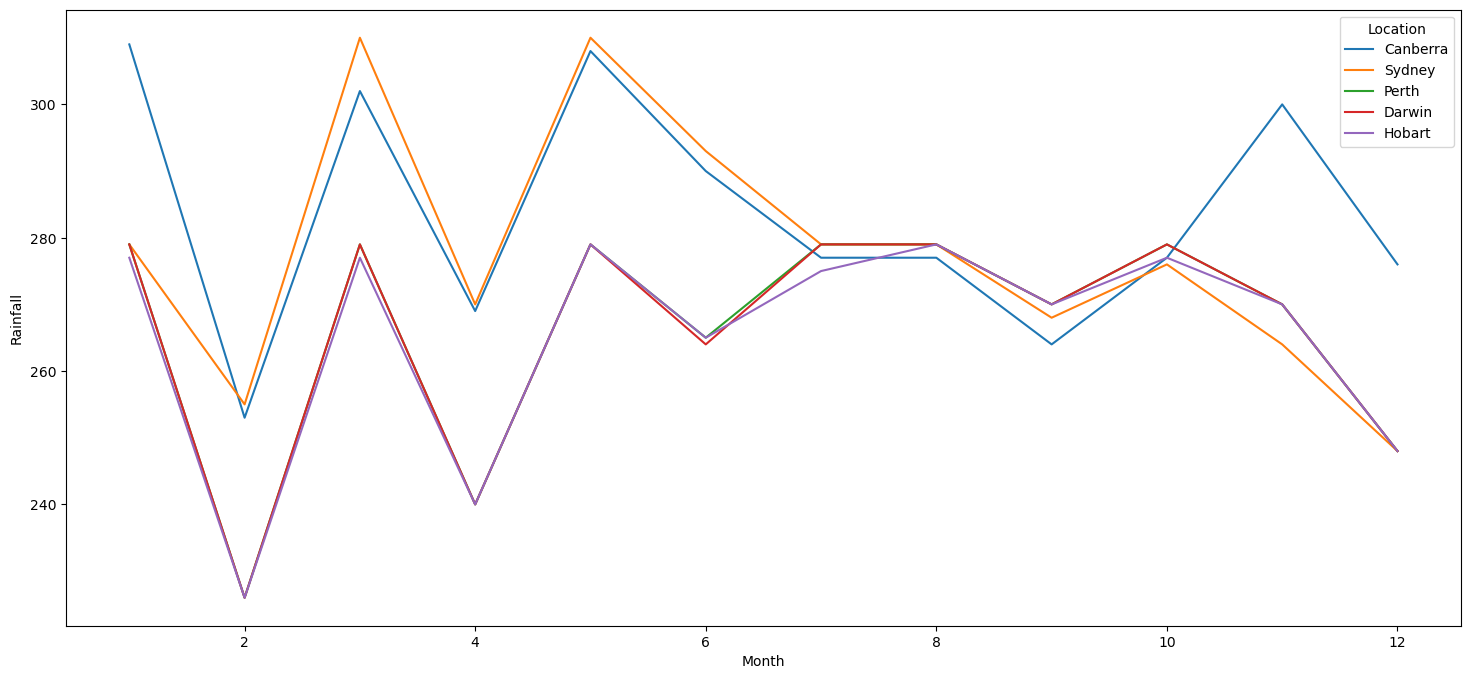

In [41]:
# Menampilkan data grafik Rainfall

rainfall_top5 = rainfall_top5.transpose()
rainfall_top5.plot(
    kind='line',
    # alpha=0.15,
    stacked=False,
    figsize=(18,8)
)

plt.ylabel('Rainfall')

In [42]:
# Menampilkan data unik 
df['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [43]:
# dilakukan pengelompokkan perhitungan kolom RainToday
df_rain = df.groupby(['Month', 'RainToday']).size().unstack()
df_rain

RainToday,No,Yes
Month,,
1,10380,2417
2,8260,2151
3,10097,2788
4,8787,2423
5,10075,2856
6,9034,3224
7,8513,3147
8,8707,2941
9,8669,2553


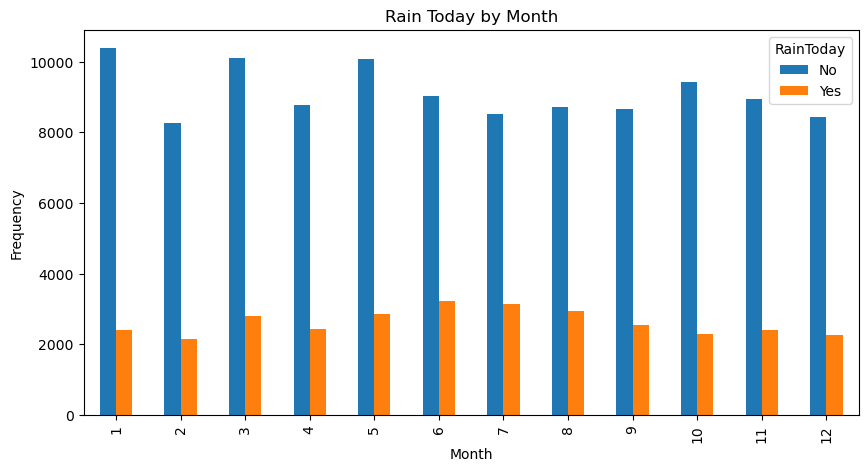

In [44]:
# Menampilkan plot bar dari dataframe 
df_rain.plot(kind='bar', figsize=(10,5))

# Menetapkan label untuk sumbu x
plt.xlabel('Month')

# Menetapkan label untuk sumbu y
plt.ylabel('Frequency')

# Menetapkan judul untuk plot
plt.title('Rain Today by Month')

# Menampilkan plot
plt.show()

Plot tersebut menunjukkan frekuensi hari hujan pada setiap bulan yang terjadi pada data yang digunakan. Sumbu x menunjukkan bulan-bulan dalam setahun sedangkan sumbu y menunjukkan frekuensi hari hujan pada bulan tersebut. Terdapat dua bar pada setiap bulan, yang pertama menunjukkan frekuensi hari tanpa hujan (RainToday='No') dan yang kedua menunjukkan frekuensi hari dengan hujan (RainToday='Yes'). Dengan plot ini kita dapat melihat pola perubahan frekuensi hari hujan pada setiap bulan dan juga membandingkan frekuensi hari hujan dengan hari tanpa hujan pada setiap bulan.

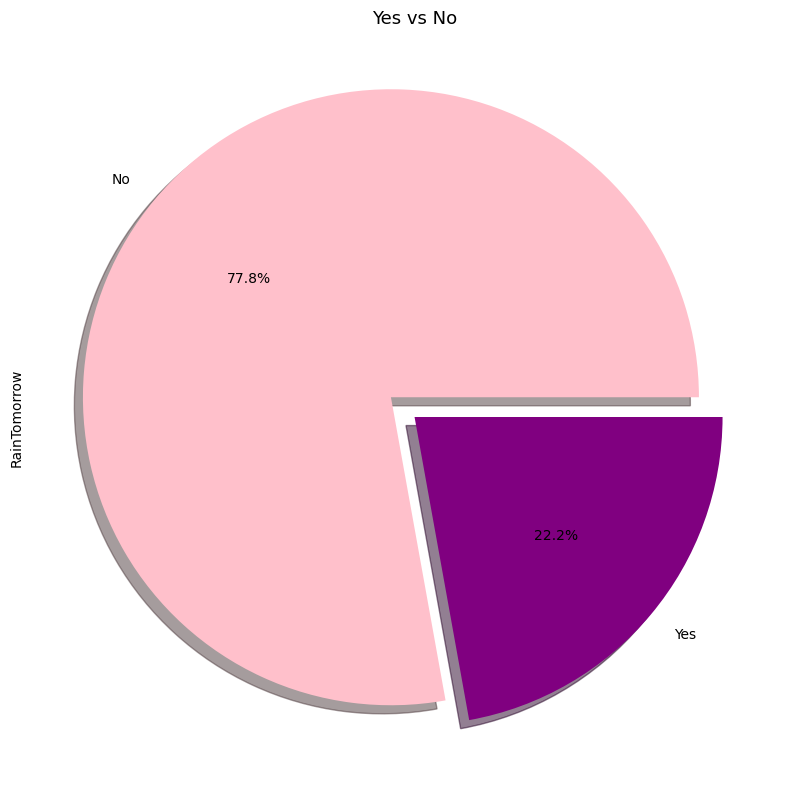

In [45]:
# Menampilkan data RainTomorrow menggunakan pie chart
rain_tomorrow = df['RainTomorrow'].value_counts()

rain_tomorrow.plot(kind='pie',
                   figsize=(10,10),
                   autopct='%1.1f%%',
                   colors=['pink','purple'],
                   shadow=True,
                   explode=[0.1,0.0])

# Menetapkan judul untuk plot
plt.title('Yes vs No', size=13)
# Menampilkan plot
plt.show()

Plot tersebut menunjukkan persentase jumlah hari hujan besok (RainTomorrow) dalam dataset yang digunakan. Terdapat dua potongan pada pie chart, yang pertama menunjukkan persentase hari tanpa hujan (RainTomorrow='No') dan yang kedua menunjukkan persentase hari dengan hujan (RainTomorrow='Yes'). Dengan plot ini kita dapat melihat secara visual persentase data RainTomorrow yang berisi Yes dan No. Pada plot tersebut juga terdapat label "autopct" yang menunjukkan nilai presentase dari setiap potongan. Di samping itu, terdapat pula parameter-parameter seperti figsize, colors, shadow, dan explode yang dapat diatur untuk memperindah tampilan dari pie chart.Dapat dilihat bahwa perbedaan datanya jauh berbeda.

### F. Data Preprocessing

In [46]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Location', 'WindDir24h', 'RainToday', 'RainTomorrow'], dtype='object')


In [47]:
numerical_columns = df.select_dtypes(include=['int','float','float64']).columns
print(numerical_columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed24h', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure', 'Month'],
      dtype='object')


#### Label Encoder

In [48]:
# Menerapkan LabelEncoder pada kolom categorical
le = LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindDir24h,WindSpeed24h,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainTomorrow,Pressure,Month
0,Albury,13.4,22.9,0.6,W,44.0,20.0,24.0,71.0,22.0,0,0,1007.40,12
1,Albury,7.4,25.1,0.0,WNW,44.0,4.0,22.0,44.0,25.0,0,0,1009.20,12
2,Albury,12.9,25.7,0.0,WSW,46.0,19.0,26.0,38.0,30.0,0,0,1008.15,12
3,Albury,9.2,28.0,0.0,NE,24.0,11.0,9.0,45.0,16.0,0,0,1015.20,12
4,Albury,17.5,32.3,1.0,W,41.0,7.0,20.0,82.0,33.0,0,0,1008.40,12


Dilakukan Label Encoder pada kolom RainToday dan RainTomorrow

In [49]:
encoded1 = pd.get_dummies(df['Location'])
encoded2 = pd.get_dummies(df['WindDir24h'])
encoder = pd.concat([encoded1, encoded2], axis=1)
encoder

,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145456,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
145457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dilakukan one hot encoder pada kolom Location dan WindDir24h

In [50]:
numerical_columns = df.loc[:, ['MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed24h', 'WindSpeed9am','WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure', 'Month']]
numerical_columns

,MinTemp,MaxTemp,Rainfall,WindSpeed24h,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure,Month
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.40,12
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1009.20,12
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1008.15,12
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1015.20,12
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1008.40,12
...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1022.95,6
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1022.45,6
145456,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1021.30,6
145457,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1018.90,6


In [51]:
numerical_columns.corr()

,MinTemp,MaxTemp,Rainfall,WindSpeed24h,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure,Month
MinTemp,1.000000,0.734443,0.103759,0.173483,0.175046,0.174386,-0.233146,0.005606,-0.433966,-0.203733
MaxTemp,0.734443,1.000000,-0.074601,0.067752,0.014455,0.050686,-0.501719,-0.500666,-0.356556,-0.164537
Rainfall,0.103759,-0.074601,1.000000,0.127689,0.086334,0.057108,0.222236,0.250666,-0.142049,-0.030863
WindSpeed24h,0.173483,0.067752,0.127689,1.000000,0.579563,0.659731,-0.210010,-0.027135,-0.409972,0.058399
WindSpeed9am,0.175046,0.014455,0.086334,0.579563,1.000000,0.513319,-0.268837,-0.031066,-0.191617,0.050886
WindSpeed3pm,0.174386,0.050686,0.057108,0.659731,0.513319,1.000000,-0.144376,0.015896,-0.261117,0.060204
Humidity9am,-0.233146,-0.501719,0.222236,-0.210010,-0.268837,-0.144376,1.000000,0.661045,0.154906,-0.090324
Humidity3pm,0.005606,-0.500666,0.250666,-0.027135,-0.031066,0.015896,0.661045,1.000000,0.010681,-0.018013
Pressure,-0.433966,-0.356556,-0.142049,-0.409972,-0.191617,-0.261117,0.154906,0.010681,1.000000,0.031134
Month,-0.203733,-0.164537,-0.030863,0.058399,0.050886,0.060204,-0.090324,-0.018013,0.031134,1.000000


<Axes: title={'center': 'Correlation in Headmap\n'}>

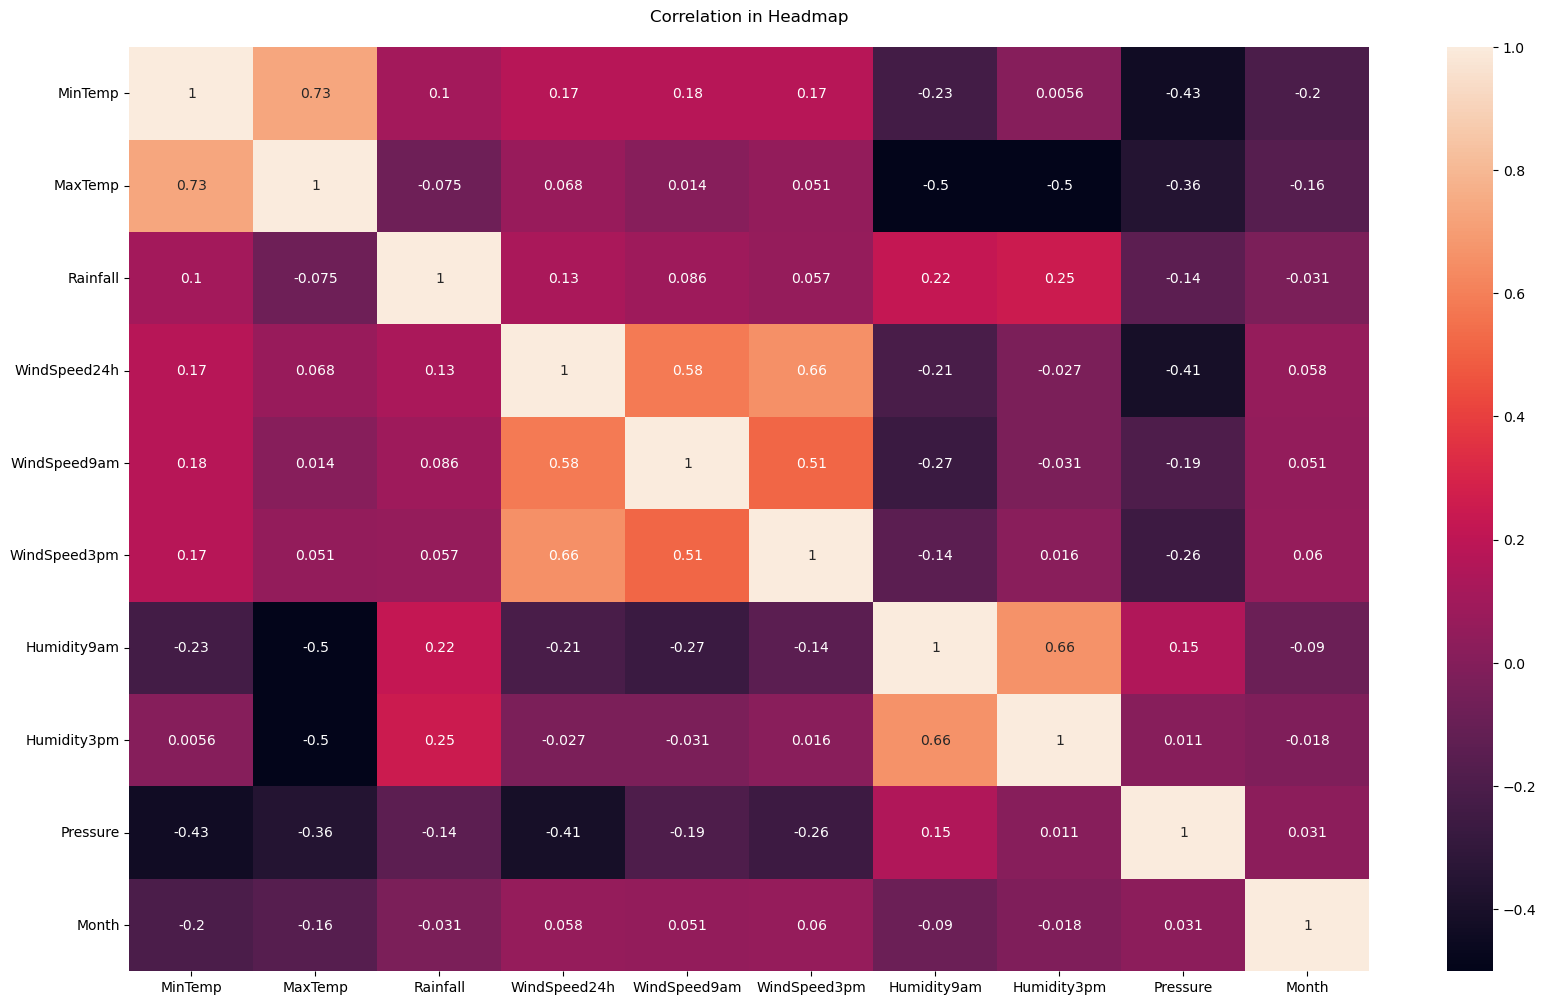

In [52]:
# Menampilkan visualisasi headmap untuk korelasi
plt.figure(figsize=(20, 12))
plt.title('Correlation in Headmap\n')
sns.heatmap(numerical_columns.corr(),annot=True)

In [53]:
df = df.join(encoder)
df.head(10)

,Location,MinTemp,MaxTemp,Rainfall,WindDir24h,WindSpeed24h,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,Albury,13.4,22.9,0.6,W,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,1,0,0
1,Albury,7.4,25.1,0.0,WNW,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,1,0
2,Albury,12.9,25.7,0.0,WSW,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,Albury,9.2,28.0,0.0,NE,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,Albury,17.5,32.3,1.0,W,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,1,0,0
5,Albury,14.6,29.7,0.2,WNW,56.0,19.0,24.0,55.0,23.0,...,0,0,0,0,0,0,0,0,1,0
6,Albury,14.3,25.0,0.0,W,50.0,20.0,24.0,49.0,19.0,...,0,0,0,0,0,0,0,1,0,0
7,Albury,7.7,26.7,0.0,W,35.0,6.0,17.0,48.0,19.0,...,0,0,0,0,0,0,0,1,0,0
8,Albury,9.7,31.9,0.0,NNW,80.0,7.0,28.0,42.0,9.0,...,1,0,0,0,0,0,0,0,0,0
9,Albury,13.1,30.1,1.4,W,28.0,15.0,11.0,58.0,27.0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
df.drop(['Location', 'WindDir24h'], axis=1, inplace=True)


In [55]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindSpeed24h,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainTomorrow,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Splitting data untuk Balancing

In [56]:
X = df.drop(['RainTomorrow'], axis=1)
Y = df['RainTomorrow']

In [57]:
X

,MinTemp,MaxTemp,Rainfall,WindSpeed24h,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,Pressure,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,0,1007.40,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,0,1009.20,...,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,0,1008.15,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,0,1015.20,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,0,1008.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,0,1022.95,...,0,0,0,0,0,0,0,0,0,0
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,0,1022.45,...,0,0,0,0,0,0,0,0,0,0
145456,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,0,1021.30,...,1,0,0,0,0,0,0,0,0,0
145457,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,0,1018.90,...,0,0,0,0,0,0,0,0,0,0


In [58]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainTomorrow, Length: 140787, dtype: int32

In [59]:
# split dataset train 70 test 30
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size= 0.3,random_state=33, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , x_test.shape)
print('y_train shape is ' , Y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (98550, 76)
X_test shape is  (42237, 76)
y_train shape is  (98550,)
y_test shape is  (42237,)


In [60]:
y_test.value_counts()

0    32872
1     9365
Name: RainTomorrow, dtype: int64

Dapat dilihat bahwa perbedaan jumlah data sangat tinggi, maka dari itu data ini disebut imbalanced. Untuk menanggulangi hal tersebut, maka dilakukan lah Balancing menggunakan fungsi SMOTE()

In [61]:
# dilakukan balancing dengan SMOTE
smote = SMOTE()
x_test, y_test = smote.fit_resample(x_test,y_test)

In [62]:
y_test.value_counts()

0    32872
1    32872
Name: RainTomorrow, dtype: int64

In [63]:
Y_train.value_counts()

0    76714
1    21836
Name: RainTomorrow, dtype: int64

Imbalanced data juga terdapat pada fitur Y_train maka juga dilakukan SMOTE agar proporsi data testing dan training sama (balance)

In [64]:
# dilakukan balancing dengan SMOTE
smote = SMOTE()
X_train, Y_train = smote.fit_resample(X_train,Y_train)

In [65]:
Y_train.value_counts()

0    76714
1    76714
Name: RainTomorrow, dtype: int64

### G. Model Definition

#### Logistic Regression

Logistic Regression adalah algoritma supervised learning yang digunakan untuk melakukan klasifikasi pada data. Tujuan utama dari logistic regression adalah untuk memprediksi kemungkinan terjadinya suatu kejadian atau tidak terjadinya suatu kejadian (dalam bentuk biner, seperti 0 atau 1).

In [66]:
# membuat pipeline
model1 = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('logisticmodel', LogisticRegression(C=1.624,max_iter= 100, penalty= 'l2', solver= 'saga'))
    ]
)

Code diatas digunakan untuk menentukan algoritma yang digunakan untuk training model, yaitu LogisticRegression() dari library sklearn.linear_model. Dan juga dilakukan normalisasi data untuk mengubah skala nilai pada fitur-fitur (features) pada data sehingga data memiliki distribusi yang sama dan terdistribusi secara normal. Beberapa hyperparameter telah ditentukan, yaitu C (regularization strength), max_iter (jumlah iterasi untuk konvergensi model), penalty (jenis regularisasi), dan solver (algoritma yang digunakan untuk menyelesaikan masalah optimasi).

#### K-Nearest Neighbors 

Algoritma KNN adalah mencari k-nearest neighbors atau tetangga terdekat dari data input yang ingin diprediksi berdasarkan jarak Euclidean atau jarak Manhattan. Kemudian, algoritma KNN akan mengambil mayoritas kelas dari tetangga terdekat tersebut untuk memprediksi kelas dari data input tersebut.

In [67]:
# membuat pipeline
model2 = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=19))
    ]
)

Pada pipeline tersebut, terdapat dua proses yang digabungkan, yaitu proses normalisasi data dengan menggunakan StandardScaler dan proses pemodelan KNN dengan menggunakan KNeighborsClassifier. KNeighborsClassifier adalah kelas dari algoritma KNN pada scikit-learn.
Pada proses pemodelan KNN, digunakan KNeighborsClassifier dengan n_neighbors=19. n_neighbors adalah hyperparameter yang digunakan untuk menentukan jumlah tetangga terdekat yang akan digunakan dalam proses klasifikasi. 

#### Desicion Tree

Decision Tree menggunakan pendekatan berbasis struktur pohon (tree-like model) yang terdiri dari berbagai keputusan dan kemungkinan hasilnya. Pada setiap node atau simpul dari pohon keputusan tersebut, terdapat keputusan atau pemisahan data berdasarkan nilai-nilai dari suatu fitur.

In [68]:
# membuat pipeline
model3 = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('desiciontree', DecisionTreeClassifier(max_depth= 8, min_samples_split= 2, min_samples_leaf= 2, max_features= 'log2'))
    ]
)

- max_depth: parameter ini menentukan kedalaman maksimum dari pohon keputusan. 
- min_samples_split: parameter ini menentukan jumlah minimum sampel yang dibutuhkan pada suatu node agar dapat dipisahkan menjadi simpul-simpul baru.
- min_samples_leaf: parameter ini menentukan jumlah minimum sampel yang dibutuhkan pada suatu leaf node. 
- max_features: parameter ini menentukan jumlah maksimum fitur yang akan digunakan untuk membuat keputusan pada setiap split pada pohon keputusan. 

#### Random Forest

Random Forest merupakan model ensemble learning yang dikembangkan dari Decision Tree. Model ini bekerja dengan mengkombinasikan beberapa decision tree yang berbeda secara acak, dengan tujuan menghasilkan model yang lebih baik dalam melakukan prediksi.

In [69]:
model4 = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('randomforest', RandomForestClassifier(max_depth= 16, max_features= 'log2', min_samples_leaf= 2, min_samples_split= 8, n_estimators= 110))
    ]
)

- max_depth: Maksimum kedalaman dari setiap pohon dalam ensemble. Semakin dalam pohon, semakin kompleks modelnya, namun juga meningkatkan risiko overfitting.
- max_features: Jumlah maksimum fitur yang digunakan pada setiap split point dalam setiap pohon. 'log2' berarti akan menggunakan log2(n_features) fitur pada setiap split point.
- min_samples_leaf: Jumlah minimum sampel yang diperlukan untuk membuat simpul daun dalam setiap pohon. Hal ini membantu menghindari overfitting.
- min_samples_split: Jumlah minimum sampel yang dibutuhkan untuk membagi simpul dalam setiap pohon. Hal ini membantu menghindari overfitting.
- n_estimators: Jumlah pohon dalam ensemble. Semakin banyak pohon, semakin kuat modelnya, namun juga semakin meningkatkan waktu pemrosesan.

#### Naive Bayes

Naive Bayes adalah metode klasifikasi yang berdasarkan teorema Bayes dengan asumsi bahwa setiap fitur yang digunakan dalam klasifikasi adalah independen satu sama lain. 

In [70]:
model5 = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('naivebayes', GaussianNB(var_smoothing=1e-20))
    ]
)

- var_smoothing: Parameter smoothing untuk menghindari kemungkinan nilai nol dalam perhitungan probabilitas. Jika suatu fitur pada data training tidak pernah muncul pada data test, maka probabilitasnya akan menjadi nol dan model tidak akan dapat memberikan prediksi yang akurat.

#### Support Vector Machine

Support Vector Machine (SVM) adalah metode klasifikasi yang populer dan efektif untuk data linear dan non-linear. SVM mencari hyperplane terbaik untuk memisahkan data ke dalam kelas yang berbeda dengan margin maksimum, di mana margin adalah jarak antara hyperplane dan titik terdekat dari kedua kelas. SVM dapat digunakan untuk klasifikasi biner maupun multikelas.

In [71]:
df

,MinTemp,MaxTemp,Rainfall,WindSpeed24h,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainTomorrow,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,0,0,...,0,0,0,0,0,0,0,0,0,0
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,0,0,...,0,0,0,0,0,0,0,0,0,0
145456,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,0,0,...,1,0,0,0,0,0,0,0,0,0
145457,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
x = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [76]:
x = x[:20000]
y = y[:20000]

In [77]:
x_train,X_test,y_train,Y_test = train_test_split(x,y,test_size= 0.3,random_state=0)

In [78]:
# Initialize SVM classifier with chosen kernel and hyperparameters
model6 = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('svm', svm.SVC(kernel='linear', C=1.0, gamma='auto'))]
)

- kernel: Fungsi kernel yang digunakan untuk mengubah data dari ruang fitur asli ke ruang fitur yang lebih tinggi dimensi.
- gamma: Parameter kernel yang mengontrol lebar fungsi kernel RBF. Nilai gamma yang lebih besar akan menghasilkan margin yang lebih kecil dan meningkatkan akurasi pada data training, namun dapat menyebabkan overfitting pada data test.
- C: Parameter regularisasi yang mengontrol penalti untuk kesalahan klasifikasi pada data training. Nilai C yang lebih kecil akan menghasilkan margin yang lebih besar, namun dapat menyebabkan lebih banyak kesalahan pada data training. 

### H. Model Training

#### Logistic Regression

In [79]:
model1.fit(X_train, Y_train)

p:\Apps\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('logisticmodel', LogisticRegression(C=1.624, solver='saga'))])

In [80]:
y_pred_1 = model1.predict(x_test)

In [81]:
model1.score(X_train,Y_train)

0.8903133717444013

In [82]:
score1 = model1.score(x_test,y_test)
print(score1)

0.890925407641762


#### K-Nearest Neighbor

In [83]:
model2.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=19))])

In [84]:
y_pred_2 = model2.predict(x_test)

In [85]:
model2.score(X_train, Y_train)

0.8903003363141018

In [86]:
score2 = model2.score(x_test, y_test)
print(score2)

0.8783311024580189


#### Desicion Tree

In [87]:
model3.fit(X_train,Y_train)
y_pred_3 = model3.predict(x_test)

In [88]:
model3.score(X_train, Y_train)

0.7519357613994838

In [89]:
score3 = model3.score(x_test, y_test)
print(score3)

0.7493763689462156


#### Random Forest

In [90]:
model4.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('randomforest',
                 RandomForestClassifier(max_depth=16, max_features='log2',
                                        min_samples_leaf=2, min_samples_split=8,
                                        n_estimators=110))])

In [91]:
y_pred_4 = model4.predict(x_test)

In [92]:
model4.score(X_train, Y_train)

0.8653244518601559

In [93]:
score4 = model4.score(x_test, y_test)
print(score4)

0.8398485032854709


#### Naive Bayes

In [94]:
model5.fit(X_train,Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('naivebayes', GaussianNB(var_smoothing=1e-20))])

In [95]:
y_pred_5 = model5.predict(x_test)

In [96]:
model5.score(X_train, Y_train)

0.8040840003128503

In [97]:
score5 = model5.score(x_test, y_test)
print(score5)

0.8028717449501095


#### Support Vector Machine

In [98]:
model6.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(gamma='auto', kernel='linear'))])

In [99]:
y_pred_6 = model6.predict(X_test)

In [100]:
score6 = model6.score(X_test, Y_test)
print(score6)

0.8531666666666666


In [101]:
model6.score(x_train, y_train)

0.8516428571428571

### I. Model Evaluation

Evaluasi model dilakukan menggunakan Confusion matriks yang merupakan sebuah tabel yang digunakan untuk mengukur kinerja model klasifikasi dengan membandingkan nilai prediksi dari model dengan nilai sebenarnya pada data uji atau validasi. Tabel tersebut terdiri dari empat nilai yaitu :

- True positive (TP) : jumlah data yang benar diprediksi sebagai positif oleh model. (Kiri atas)
- True negative (TN) : jumlah data yang benar diprediksi sebagai negatif oleh model. (Kanan bawah)
- False positive (FP) : jumlah data yang salah diprediksi sebagai positif oleh model. (Kanan atas)
- False negative (FN) : jumlah data yang salah diprediksi sebagai negatif oleh model. (Kiri bawah)

In [102]:
print('Classifcation report:\n', classification_report(y_test, y_pred_1))
conf_mat = confusion_matrix(y_true = y_test, y_pred = y_pred_1)
print('Confusion matrix:\n', conf_mat)
print('\nscore matrics', accuracy_score(y_test, y_pred_1))

Classifcation report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90     32872
           1       0.93      0.85      0.89     32872

    accuracy                           0.89     65744
   macro avg       0.89      0.89      0.89     65744
weighted avg       0.89      0.89      0.89     65744

Confusion matrix:
 [[30779  2093]
 [ 5078 27794]]

score matrics 0.890925407641762


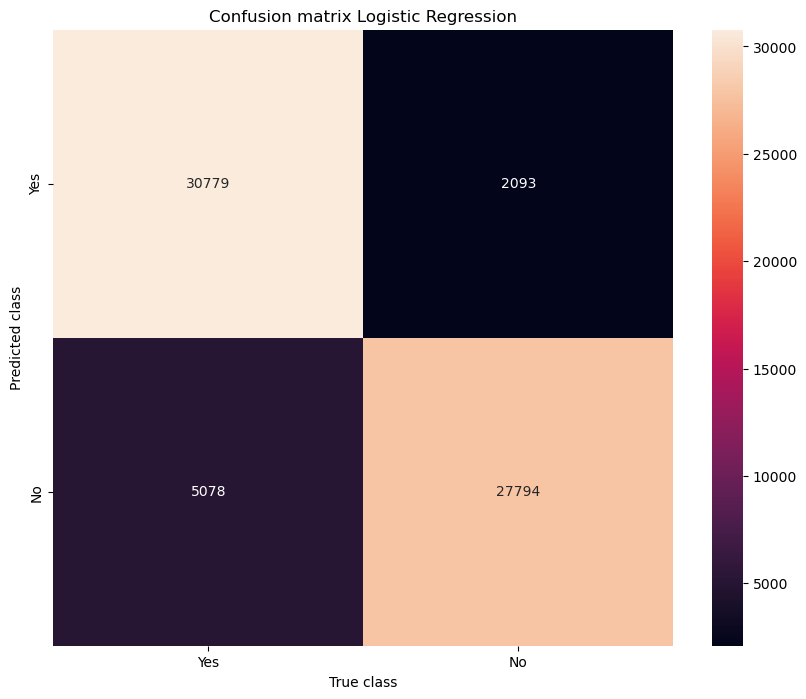

In [103]:
#visulalizing the confusion matrix
LABELS = ['Yes', 'No'] 
conf_matrix = confusion_matrix(y_test, y_pred_1) 
plt.figure(figsize =(10, 8)) 

sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix Logistic Regression") 
plt.ylabel('Predicted class') 
plt.xlabel('True class') 
plt.show() 

#### K-Nearest Neighbor

In [104]:
print('Classifcation report:\n', classification_report(y_test, y_pred_2))
conf_mat = confusion_matrix(y_true = y_test, y_pred = y_pred_2)
print('Confusion matrix:\n', conf_mat)
print('\nscore matrics', accuracy_score(y_test, y_pred_2))

Classifcation report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89     32872
           1       0.94      0.81      0.87     32872

    accuracy                           0.88     65744
   macro avg       0.89      0.88      0.88     65744
weighted avg       0.89      0.88      0.88     65744

Confusion matrix:
 [[31241  1631]
 [ 6368 26504]]

score matrics 0.8783311024580189


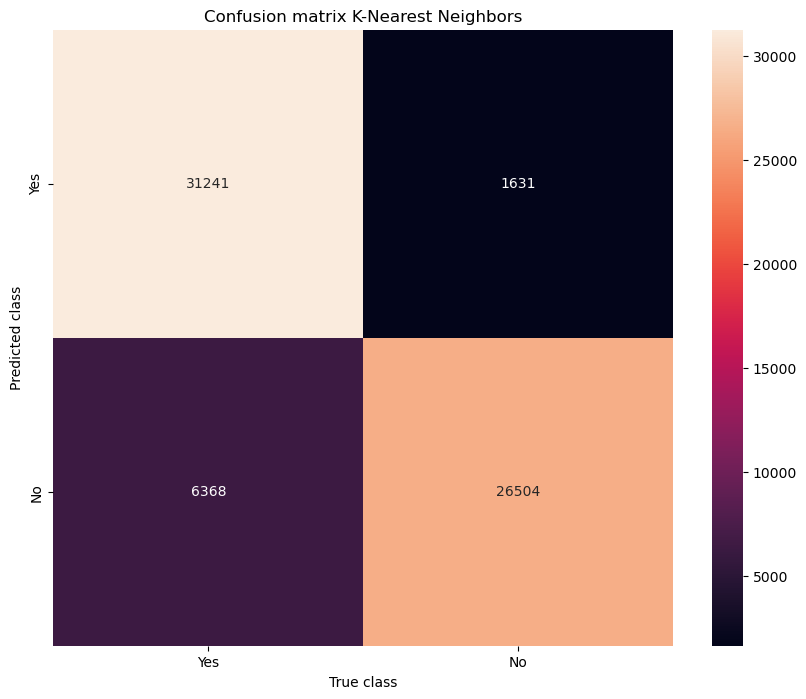

In [105]:
#visulalizing the confusion matrix
LABELS = ['Yes', 'No'] 
conf_matrix = confusion_matrix(y_test, y_pred_2) 
plt.figure(figsize =(10, 8)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix K-Nearest Neighbors") 
plt.ylabel('Predicted class') 
plt.xlabel('True class') 
plt.show() 

#### Decision Tree

In [106]:
print('Classifcation report:\n', classification_report(y_test, y_pred_3))
conf_mat = confusion_matrix(y_true = y_test, y_pred = y_pred_3)
print('Confusion matrix:\n', conf_mat)
print('\nscore matrics', accuracy_score(y_test, y_pred_3))

Classifcation report:
               precision    recall  f1-score   support

           0       0.72      0.81      0.76     32872
           1       0.78      0.69      0.73     32872

    accuracy                           0.75     65744
   macro avg       0.75      0.75      0.75     65744
weighted avg       0.75      0.75      0.75     65744

Confusion matrix:
 [[26579  6293]
 [10184 22688]]

score matrics 0.7493763689462156


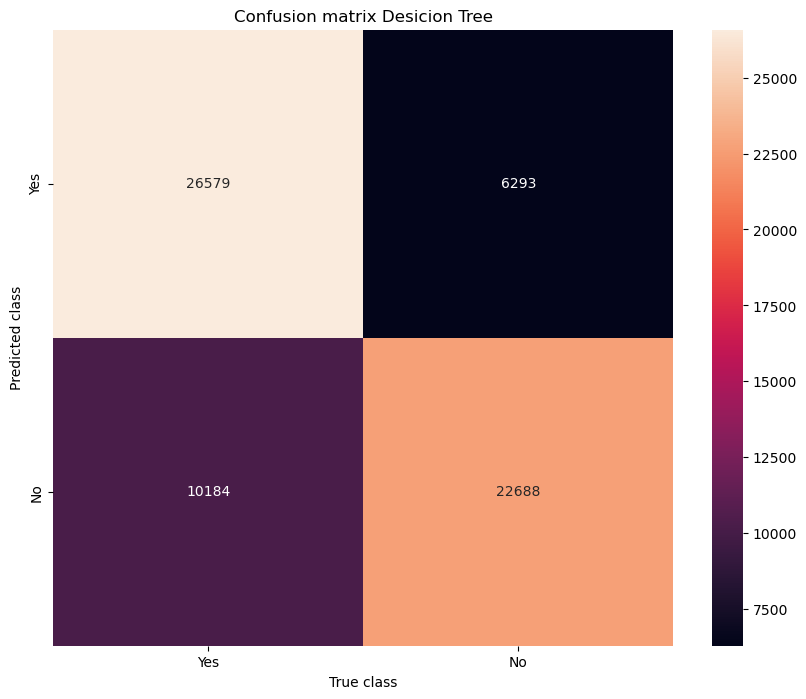

In [107]:
#visulalizing the confusion matrix
LABELS = ['Yes', 'No'] 
conf_matrix = confusion_matrix(y_test, y_pred_3) 
plt.figure(figsize =(10, 8)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix Desicion Tree") 
plt.ylabel('Predicted class') 
plt.xlabel('True class') 
plt.show() 

#### Random Forest

In [108]:
print('Classifcation report:\n', classification_report(y_test, y_pred_4))
conf_mat = confusion_matrix(y_true = y_test, y_pred = y_pred_4)
print('Confusion matrix:\n', conf_mat)
print('\nscore matrics', accuracy_score(y_test, y_pred_4))

Classifcation report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84     32872
           1       0.86      0.81      0.84     32872

    accuracy                           0.84     65744
   macro avg       0.84      0.84      0.84     65744
weighted avg       0.84      0.84      0.84     65744

Confusion matrix:
 [[28517  4355]
 [ 6174 26698]]

score matrics 0.8398485032854709


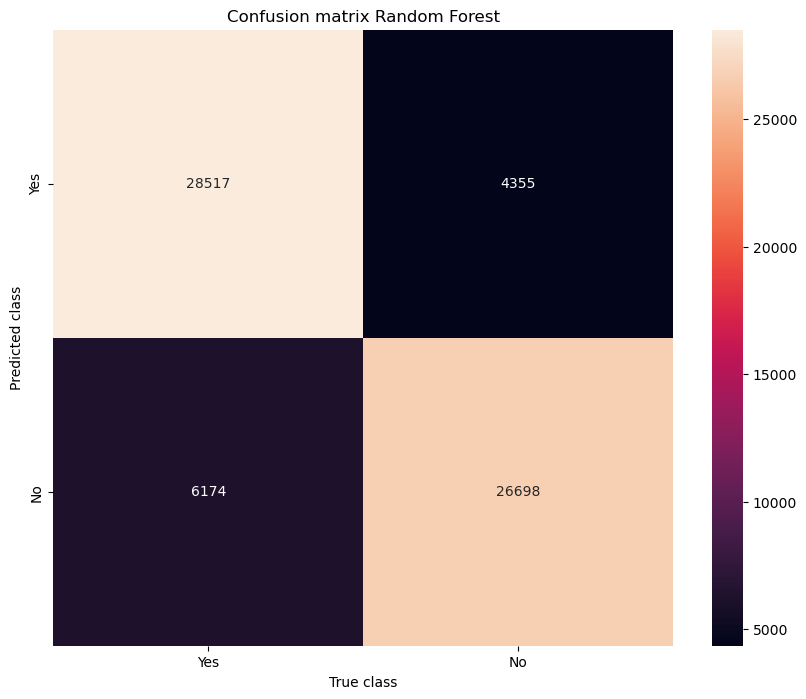

In [109]:
#visulalizing the confusion matrix
LABELS = ['Yes', 'No'] 
conf_matrix = confusion_matrix(y_test, y_pred_4) 
plt.figure(figsize =(10, 8)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix Random Forest") 
plt.ylabel('Predicted class') 
plt.xlabel('True class') 
plt.show() 

#### Naive Bayes

In [110]:
print('Classifcation report:\n', classification_report(y_test, y_pred_5))
conf_mat = confusion_matrix(y_true = y_test, y_pred = y_pred_5)
print('Confusion matrix:\n', conf_mat)
print('\nscore matrics', accuracy_score(y_test, y_pred_5))

Classifcation report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81     32872
           1       0.82      0.78      0.80     32872

    accuracy                           0.80     65744
   macro avg       0.80      0.80      0.80     65744
weighted avg       0.80      0.80      0.80     65744

Confusion matrix:
 [[27041  5831]
 [ 7129 25743]]

score matrics 0.8028717449501095


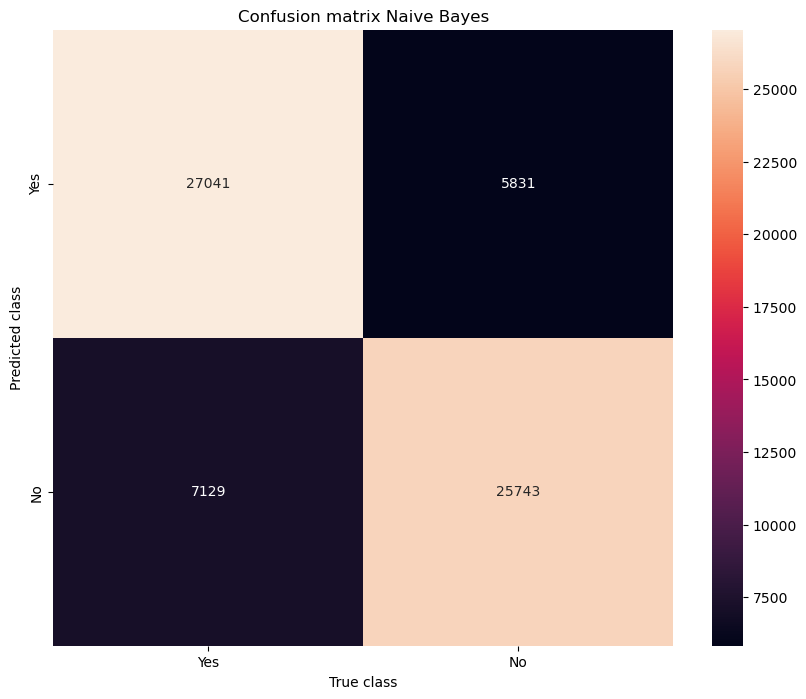

In [111]:
#visulalizing the confusion matrix
LABELS = ['Yes', 'No'] 
conf_matrix = confusion_matrix(y_test, y_pred_5) 
plt.figure(figsize =(10, 8)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix Naive Bayes") 
plt.ylabel('Predicted class') 
plt.xlabel('True class') 
plt.show() 

#### Support Vector Machine

In [112]:
print('Classifcation report:\n', classification_report(Y_test, y_pred_6))
conf_mat = confusion_matrix(y_true = Y_test, y_pred = y_pred_6)
print('Confusion matrix:\n', conf_mat)
print('\nscore matrics', accuracy_score(Y_test, y_pred_6))

Classifcation report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      4804
           1       0.73      0.42      0.53      1196

    accuracy                           0.85      6000
   macro avg       0.80      0.69      0.72      6000
weighted avg       0.84      0.85      0.84      6000

Confusion matrix:
 [[4616  188]
 [ 693  503]]

score matrics 0.8531666666666666


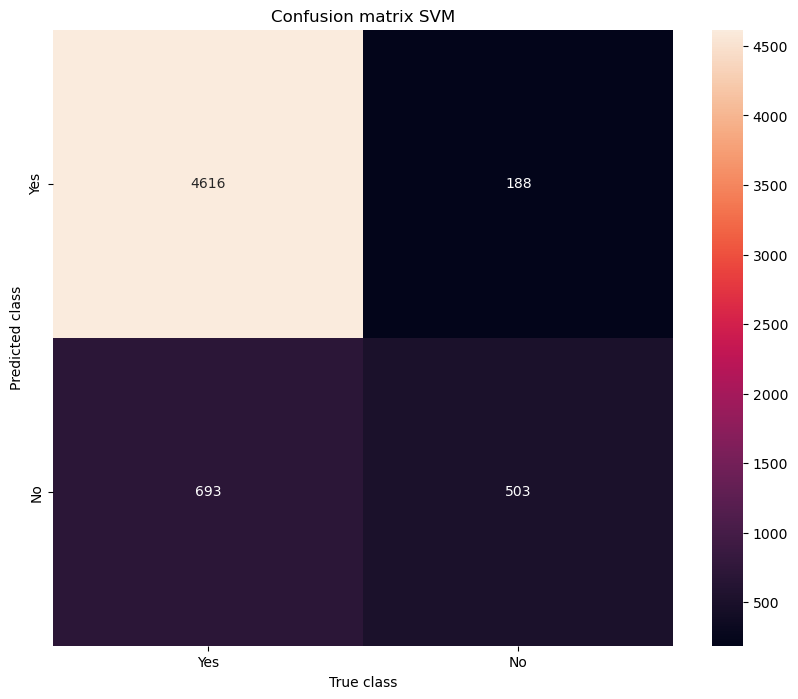

In [141]:
#visulalizing the confusion matrix

LABELS = ['Yes', 'No'] 
conf_matrix = confusion_matrix(Y_test, y_pred_6) 
plt.figure(figsize =(10, 8)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d"); 

plt.title("Confusion matrix SVM") 
plt.ylabel('Predicted class') 
plt.xlabel('True class') 
plt.show() 


In [142]:
print("Logistic Regression : ", score1)
print("KNN                 : ", score2)
print("Desicion Tree       : ", score3)
print("Random Forest       : ", score4)
print("Naive Bayes         : ", score5)
print("SVM                 : ", score6)

Logistic Regression :  0.890925407641762
KNN                 :  0.8783311024580189
Desicion Tree       :  0.7493763689462156
Random Forest       :  0.8398485032854709
Naive Bayes         :  0.8028717449501095
SVM                 :  0.8531666666666666


Diatas merupakan semua akurasi/performa model, model dengan performa terbaik adalah Logistic Regression, Maka dapat dipastikan bahwa model tersebut paling baik dalam mengklasifikasi data.

### J. Modelling With ROC AUC

Dilakukan percobaan modelling dengan ROC AUC (Receiver Operating Characteristic Area Under the Curve) yang merupakan suatu metrik evaluasi kinerja model yang digunakan untuk mengukur seberapa baik model dalam membedakan antara dua kelas pada suatu data dengan perbandingan jumlah anggota kelas yang tidak seimbang. Maka modelling ini tidak menggunakan data splitting diatas karena tidak menggunakan SMOTE untuk balancing data.

In [116]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindSpeed24h,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainTomorrow,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [117]:
X1 = X
X1

,MinTemp,MaxTemp,Rainfall,WindSpeed24h,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,Pressure,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,0,1007.40,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,0,1009.20,...,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,0,1008.15,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,0,1015.20,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,0,1008.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,0,1022.95,...,0,0,0,0,0,0,0,0,0,0
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,0,1022.45,...,0,0,0,0,0,0,0,0,0,0
145456,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,0,1021.30,...,1,0,0,0,0,0,0,0,0,0
145457,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,0,1018.90,...,0,0,0,0,0,0,0,0,0,0


In [118]:
Y1 = Y
Y1

0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainTomorrow, Length: 140787, dtype: int32

In [119]:
X1_train,x1_test,Y1_train,y1_test = train_test_split(X1,Y1,test_size= 0.3,random_state=33, shuffle =True)
print('X_train shape is ' , X1_train.shape)
print('X_test shape is ' , x1_test.shape)
print('y_train shape is ' , Y1_train.shape)
print('y_test shape is ' , y1_test.shape)

X_train shape is  (98550, 76)
X_test shape is  (42237, 76)
y_train shape is  (98550,)
y_test shape is  (42237,)


#### Logistic Regression with ROC AUC

In [120]:
# membuat pipeline
model_lr = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('logisticmodel', LogisticRegression(solver='liblinear',multi_class='ovr', random_state=0,C=0.05))
    ]
)

In [121]:
model_lr.fit(X1_train, Y1_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logisticmodel',
                 LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                                    solver='liblinear'))])

In [122]:
y_pred_lr = model_lr.predict(x1_test)

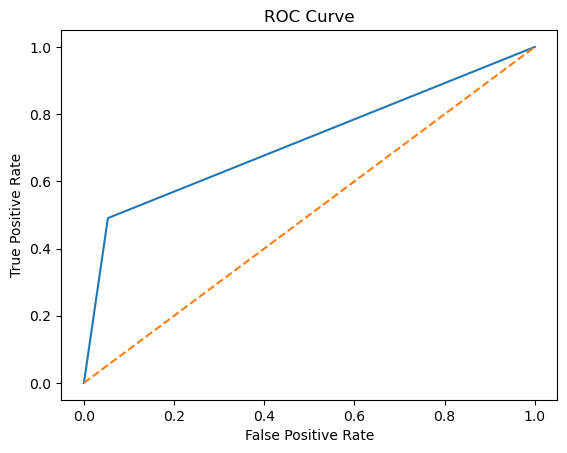

AUC ROC: 0.72


In [123]:
# Menghitung nilai False Positive Rate (FPR) dan True Positive Rate (TPR)
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_lr)

# Membuat plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--') # Garis acak
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Menghitung nilai ROC AUC
roc_auc = roc_auc_score(y1_test, y_pred_lr)
print(f'AUC ROC: {roc_auc:.2f}')

#### Random Forest with ROC AUC

In [124]:
model_rf = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('randomforest', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
    ]
)

In [125]:
model_rf.fit(X1_train, Y1_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('randomforest',
                 RandomForestClassifier(max_depth=10, random_state=42))])

In [126]:
y_pred_rf = model_rf.predict(x1_test)

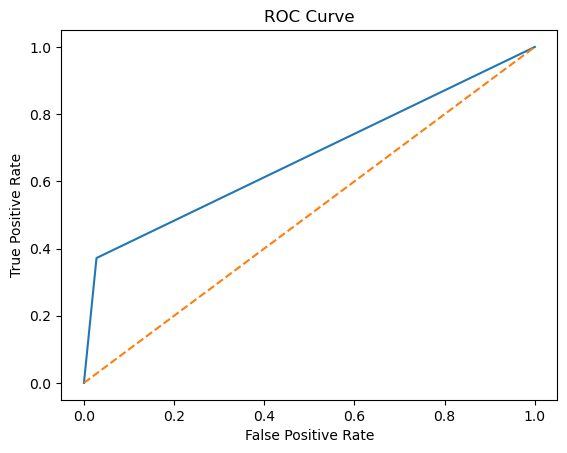

AUC ROC: 0.67


In [127]:
# Menghitung nilai False Positive Rate (FPR) dan True Positive Rate (TPR)
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_rf)

# Membuat plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--') # Garis acak
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Menghitung nilai ROC AUC
roc_auc = roc_auc_score(y1_test, y_pred_rf)
print(f'AUC ROC: {roc_auc:.2f}')

#### KNN with ROC AUC

In [128]:
# membuat pipeline
model_knn = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=3))
    ]
)

In [129]:
model_knn.fit(X1_train, Y1_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [130]:
y_pred_knn = model_knn.predict(x1_test)

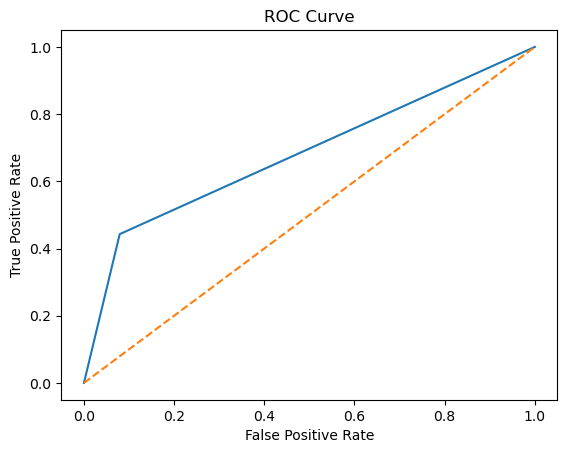

AUC ROC: 0.68


In [131]:
# Menghitung nilai False Positive Rate (FPR) dan True Positive Rate (TPR)
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_knn)

# Membuat plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--') # Garis acak
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Menghitung nilai ROC AUC
roc_auc = roc_auc_score(y1_test, y_pred_knn)
print(f'AUC ROC: {roc_auc:.2f}')

### Kesimpulan
1. Terdapat beberapa variabel yang paling berpengaruh terhadap pengaruh terjadinya hujan besok harinya, yaitu Humidity3pm, Humidity9am, RainToday, Pressure dan WindSpeed24h.
2. Model yang digunakan dalam project ini ada 6 yaitu beserta akurasinya :
* Logistic Regression :  0.890925407641762
* KNN                 :  0.8783311024580189
* Desicion Tree       :  0.7493763689462156
* Random Forest       :  0.8398485032854709
* Naive Bayes         :  0.8028717449501095
* SVM                 :  0.8531666666666666

Dan Performa Model yang terbaik untuk memprediksi kelas dalam klasifikasi ini adalah model Logistic Regression.

3. Data yang tersebar dalam kolom kelas memiliki persebaran yang imbalanced, maka harus dilakukan teknik SMOTE untuk membuat data menjadi balance. 
4. Namun, terdapat metric yang dapat digunakan untuk mengatasi data yang imbalanced yaitu ROC AUC. ROC Curve digunakan untuk memvisualisasikan performa model secara grafis, sedangkan AUC ROC digunakan untuk memberikan nilai numerik dari performa model.
5. Berdasarkan 3 model yang dijalankan menggunakan ROC AUC, model logistic regression yang menghasilkan nilai/performa terbaik dengan 0.72. 